In [ ]:
from google.colab import files
files.upload()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file = pd.read_csv('People disappeared during Maoist war.csv')

In [8]:
file.head(3)

,Missing/Dead,District,Zone,Geographical Region,Development Region,Full Name,Gender,Date of Birth,Year of birth,Place Of Birth,Father'S Name,Date of disapperance,Year of disaaperance,Place of disapperance,District of disapperance
0,Death,Achham,Seti,Hill,Far-Western,Bhoj Bahadur Mijar,M,00/00/1972,1972,Achham,Bhaire Mijar,20/11/2002,2002,Dipayal,Doti
1,Death,Achham,Seti,Hill,Far-Western,Dabal Bahadur Saud,M,00/11/1959,1959,Achham,Dal Bahadur Saud,3/9/2004,2004,Ramarosan,Achham
2,Death,Achham,Seti,Hill,Far-Western,Padam Raj Neupane,M,00/00/1985,1985,Achham,Umakanta Neupane,5/3/2005,2005,Batulasen,Achham


##### Rename the column

In [9]:
file.rename(columns={'Missing/Dead': 'miss_dead', 'Geographical Region': 'geo_region', 'evelopment Region':'dev_region', "Father'S Name":'Father_name'}, inplace=True)

In [10]:
file.head(3)

,miss_dead,District,Zone,geo_region,Development Region,Full Name,Gender,Date of Birth,Year of birth,Place Of Birth,Father_name,Date of disapperance,Year of disaaperance,Place of disapperance,District of disapperance
0,Death,Achham,Seti,Hill,Far-Western,Bhoj Bahadur Mijar,M,00/00/1972,1972,Achham,Bhaire Mijar,20/11/2002,2002,Dipayal,Doti
1,Death,Achham,Seti,Hill,Far-Western,Dabal Bahadur Saud,M,00/11/1959,1959,Achham,Dal Bahadur Saud,3/9/2004,2004,Ramarosan,Achham
2,Death,Achham,Seti,Hill,Far-Western,Padam Raj Neupane,M,00/00/1985,1985,Achham,Umakanta Neupane,5/3/2005,2005,Batulasen,Achham


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


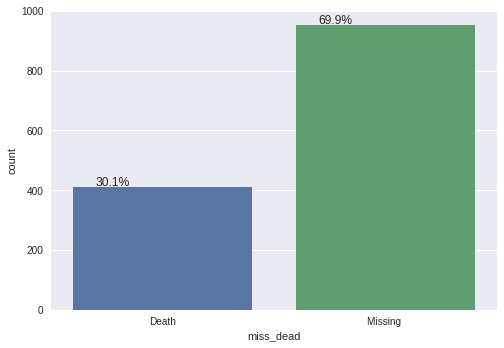

In [28]:
total = len(file)*1
ax = sns.countplot('miss_dead',data=file)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))


In [0]:
# In every 100 missing/dead people during the war, about 30 of them are found dead and rest 70 are still missing.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


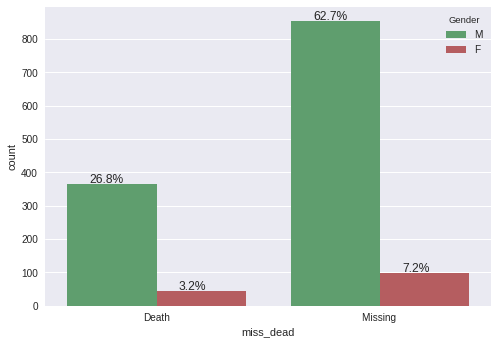

In [23]:
ax = sns.countplot('miss_dead',data=file,hue='Gender',palette=[ "C1","C2"])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

In [0]:
# for every 1000 people dead/missing during the war, 268 of dead people are male and 32 of dead are female similarly 627 missing people are male and 72 are female missing. 

In [66]:
district_datst = file['Place Of Birth'].unique()
list_of_district = ['Bhojpur','Dhankuta','Morang','Sankhuwasabha','Sunsari','Terathum','Illam','Jhapa','Panchthar','Taplejung','Khotang','Okhaldhunga','Saptari','Siraha','Solukhumbu','Udayapur','Bhaktapur','Dhading','Kathmandu','Kavrepalanchok','Lalitpur','Nuwakot','Rasuwa','Sindhupalchowk','Dhanusa','Dolkha','Mahottari','Ramechhap','Sarlahi','Sindhuli','Bara','Chitwan','Makwanpur','Parsa','Rautahat','Baglung','Mustang','Myagdi','Parbat','Gorkha','Kaski','Lamjung','Manang','Syangja','Tanahu','Arghakhanchi','Gulmi','Kapilvastu','Nawalparasi','Palpa','Rupandehi','Banke','Bardiya','Dailekh','Jajarkot','Surkhet','Dolpa','Humla','Jumla','Kalikot','Mugu','Dang','Pyuthan','Rolpa','Rukum','Salyan','Baidadi','Dadeldhura','Darchula','Kanchanpur','Achham','Bajhang','Bajura','Doti','Kailali']
print(list(set(list_of_district) - set(district_datst)))
list(set(district_datst) - set(list_of_district))

['Manang', 'Dolkha', 'Terathum', 'Solukhumbu', 'Bajura', 'Mustang', 'Baidadi', 'Kavrepalanchok', 'Illam', 'Kapilvastu']


['Baitadi',
 'Unknown',
 'Terhathum',
 'Dolakha',
 'Kavrepalanchowk',
 'Ilam',
 'Kapilbastu',
 'Solukhumbhu']

###### There is no official documentation for people from 3 district viz 'Manang','Bajura' and 'Mustang'.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


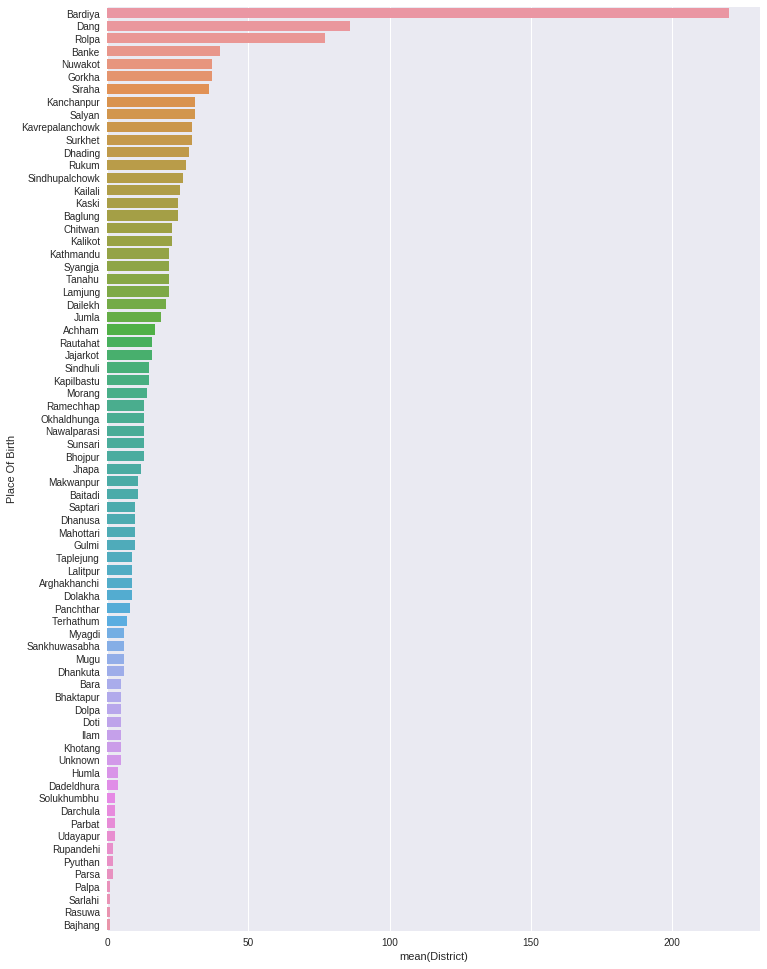

In [61]:
sns.set(rc={'figure.figsize':(11.7,17)})
by_place = file.groupby('Place Of Birth').count()
by_place.reset_index(level=0, inplace=True)
# by_place.sort_values()
sns.barplot(y='Place Of Birth',x='District',data=by_place.sort_values(by='District',ascending=False))

###### bardiya, dang and rolpa district have more complaints in people missing/dead.

In [83]:
file['Year of birth'].value_counts()

1980    77
1979    75
1983    75
1982    71
1984    68
1981    68
1977    65
1978    61
1975    53
1976    48
1985    48
1971    46
1974    43
1969    41
1972    40
1986    36
1970    36
1973    32
1967    30
1987    27
1968    27
1966    25
1963    21
1961    21
1965    20
1959    19
1962    19
1964    16
1958    15
1988    13
1989    13
1960    11
1953     9
1956     9
1957     9
1950     8
1951     7
1955     7
1948     7
1946     6
1945     5
1949     4
1944     4
1990     4
1947     3
1941     3
1992     3
1954     3
1952     2
1991     2
1942     1
1940     1
2001     1
1943     1
1999     1
1938     1
Name: Year of birth, dtype: int64

###### Those people who are dead/missing are mostly born inbetween 1975-1983 as moist war last from 1996 to 2006. So,when the war was started they are at the age between 13-23

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


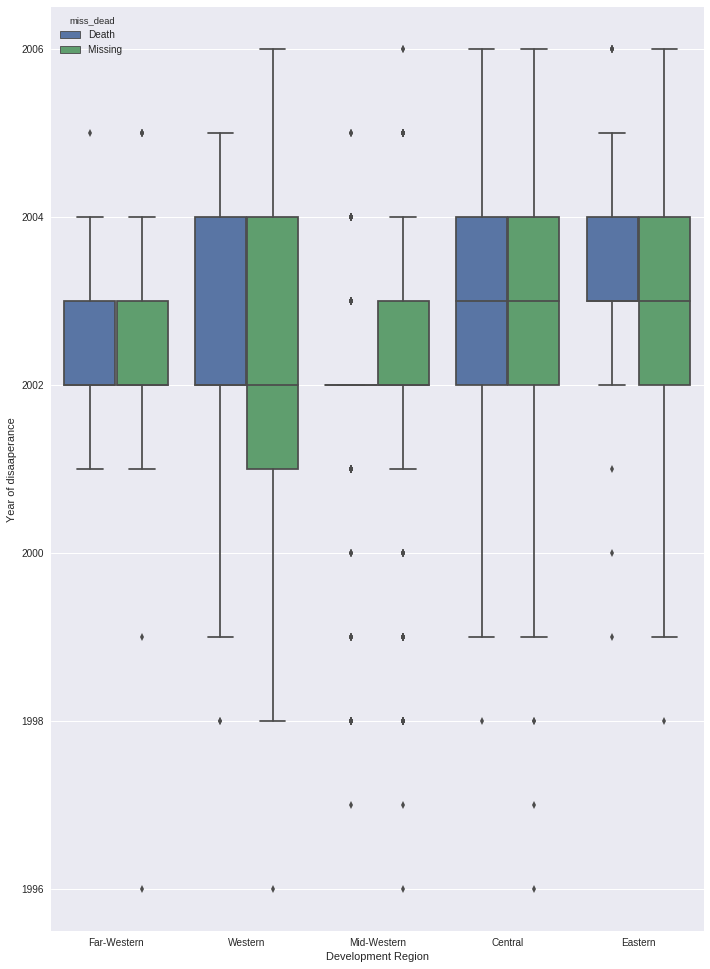

In [85]:
sns.boxplot(x='Development Region',hue='miss_dead',y='Year of disaaperance',data=file)

##### 1)People start missing from Western development region
##### 2)There is very few dead people report from Mid-Western Development Region
##### 3)After year 2003 people missing/dead report from Far-Western and Mid-western are reduced dramatically.



In [7]:
file.groupby('Zone').describe()

Year of birth                                                   \
                    count         mean        std     min      25%     50%   
Zone                                                                         
Bagmati             187.0  1974.133690   8.879013  1941.0  1968.00  1976.0   
Bheri               448.0  1975.040179   9.588313  1943.0  1970.00  1978.0   
Dhawalagiri          28.0  1974.928571   8.498055  1958.0  1970.50  1975.0   
Gandaki             101.0  1972.930693   9.776766  1945.0  1968.00  1976.0   
Janakpur             48.0  1972.500000  10.601084  1947.0  1963.75  1975.0   
Karnali              53.0  1980.301887   6.506165  1966.0  1978.00  1982.0   
Kosi                 56.0  1973.714286  11.366161  1944.0  1968.75  1977.0   
Lumbini              54.0  1977.111111   8.542163  1950.0  1971.25  1980.0   
Mahakali             47.0  1975.702128   9.864109  1941.0  1971.00  1977.0   
Mechi                29.0  1976.206897   7.153317  1957.0  1971.00  1977.0   
Narayani             72.0  1969.805556  11.651801  1940.0  1962.75  1972.0   
Rapti               131.0  1974.221374  10.538786  1944.0  1969.00  1978.0   
Sagarmatha           63.0  1973.476190  10.346976  1942.0  1969.00  1974.0   
Seti                 44.0  1974.250000  11.375463  1938.0  1967.75  1975.5   

                             Year of disaaperance                         \
                 75%     max                count         mean       std   
Zone                                                                       
Bagmati      1981.00  1988.0                187.0  2002.786096  1.588676   
Bheri        1982.00  1992.0                448.0  2002.104911  1.260366   
Dhawalagiri  1982.00  1988.0                 28.0  2002.392857  1.257254   
Gandaki      1979.00  1986.0                101.0  2001.910891  2.059607   
Janakpur     1980.00  1987.0                 48.0  2002.625000  1.632450   
Karnali      1985.00  1989.0                 53.0  2002.245283  1.543045   
Kosi         1981.00  1999.0                 56.0  2003.250000  1.620886   
Lumbini      1983.50  1992.0                 54.0  2002.759259  1.989929   
Mahakali     1983.00  1992.0                 47.0  2001.914894  1.212790   
Mechi        1982.00  1988.0                 29.0  2003.068966  1.162849   
Narayani     1979.25  1985.0                 72.0  2002.791667  1.519243   
Rapti        1982.00  1990.0                131.0  2001.160305  1.932781   
Sagarmatha   1981.00  2001.0                 63.0  2003.047619  1.660048   
Seti         1984.00  1990.0                 44.0  2002.727273  1.086142   

                                                      
                min      25%     50%     75%     max  
Zone                                                  
Bagmati      1996.0  2002.00  2003.0  2004.0  2006.0  
Bheri        1998.0  2002.00  2002.0  2002.0  2006.0  
Dhawalagiri  2000.0  2002.00  2002.0  2003.0  2006.0  
Gandaki      1996.0  2001.00  2002.0  2004.0  2006.0  
Janakpur     1998.0  2002.75  2003.0  2003.0  2006.0  
Karnali      1997.0  2002.00  2002.0  2003.0  2005.0  
Kosi         1998.0  2002.00  2003.0  2004.0  2006.0  
Lumbini      1998.0  2002.00  2003.0  2004.0  2006.0  
Mahakali     1996.0  2002.00  2002.0  2002.0  2005.0  
Mechi        2001.0  2002.00  2003.0  2004.0  2006.0  
Narayani     1998.0  2002.00  2003.0  2004.0  2006.0  
Rapti        1996.0  2000.00  2002.0  2002.0  2005.0  
Sagarmatha   1999.0  2002.00  2003.0  2004.0  2006.0  
Seti         2001.0  2002.00  2002.0  2003.0  2005.0

###### Among 14 district, mean year of disapperance for most of the zone is between 2001-2003

In [13]:
file.groupby(['miss_dead','District','Gender'])['Place Of Birth'].describe()

count unique              top freq
miss_dead District      Gender                                   
Death     Achham        M          3      1           Achham    3
          Arghakhanchi  M          1      1     Arghakhanchi    1
          Baglung       F          1      1          Baglung    1
                        M          3      2          Baglung    2
          Baitadi       M          3      2          Baitadi    2
          Banke         F          4      3            Banke    2
                        M         12      6            Banke    6
          Bara          M          2      1             Bara    2
          Bardiya       F          9      1          Bardiya    9
                        M         83     11          Bardiya   70
          Bhaktapur     F          1      1        Kathmandu    1
                        M          3      3  Kavrepalanchowk    1
          Bhojpur       M          1      1          Bhojpur    1
          Chitawan      F          3      3          Chitwan    1
                        M          8      4          Chitwan    5
          Dadeldhura    M          2      2          Baitadi    1
          Dailekh       F          2      1          Dailekh    2
                        M          4      1          Dailekh    4
          Dang          F          4      2             Dang    3
                        M         25      3             Dang   22
          Dhading       F          1      1          Nuwakot    1
                        M          2      1          Dhading    2
          Dhankuta      M          2      1         Dhankuta    2
          Dhanusa       M          8      1          Dhanusa    8
          Doti          M          1      1             Doti    1
          Gorkha        M         10      1           Gorkha   10
          Humla         M          1      1            Humla    1
          Ilam          M          1      1             Ilam    1
          Jajarkot      M          5      1         Jajarkot    5
          Jhapa         M          2      2            Jhapa    1
...                              ...    ...              ...  ...
Missing   Parsa         M          1      1          Chitwan    1
          Pyuthan       M          2      2          Pyuthan    1
          Ramechhap     M          9      1        Ramechhap    9
          Rasuwa        M          1      1           Rasuwa    1
          Rautahat      F          2      1         Rautahat    2
                        M         11      3         Rautahat    9
          Rolpa         F          5      1            Rolpa    5
                        M         30      1            Rolpa   30
          Rukum         M          9      1            Rukum    9
          Rupandehi     M          4      3            Gulmi    2
          Salyan        M         14      1           Salyan   14
          Sankhuwasabha M          6      3    Sankhuwasabha    4
          Saptari       F          1      1          Saptari    1
                        M         10      2          Saptari    9
          Sindhuli      F          2      1         Sindhuli    2
                        M          8      1         Sindhuli    8
          Sindhupalchok F          3      1   Sindhupalchowk    3
                        M         15      1   Sindhupalchowk   15
          Siraha        M         26      1           Siraha   26
          Sunsari       M         16      5          Sunsari   11
          Surkhet       F          4      1          Surkhet    4
                        M         13      5          Surkhet    7
          Syangja       F          1      1          Syangja    1
                        M         12      1          Syangja   12
          Tanahu        F          2      1           Tanahu    2
                        M          8      1           Tanahu    8
          Taplejung     F          1      1        Taplejung    1
          Terhathum     F          1      1        Terhathum    1
     

In [14]:
def keep_sirname(x):
    x = x.split()
    return x[-1]
file['Father_name'] = file['Father_name'].apply(keep_sirname)

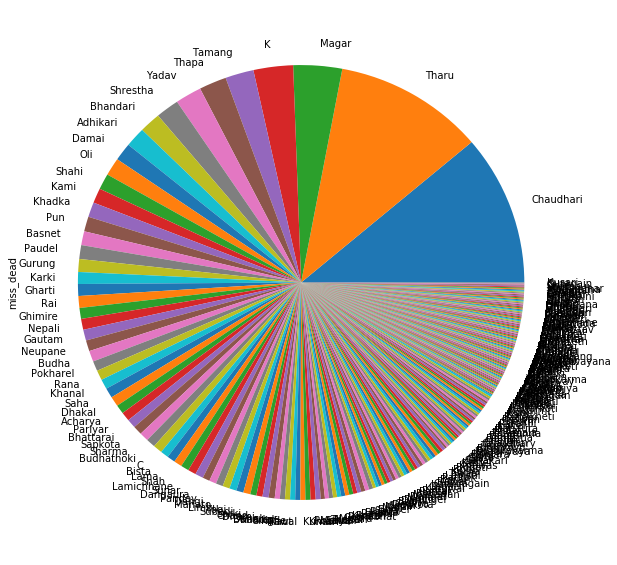

In [33]:
file.groupby('Father_name')['miss_dead'].count().sort_values(ascending=False).plot(kind='pie',stacked=True,figsize=(10,10))


##### chaudhari, Tharu and magar people are most dead/missed during civilwar. 

In [38]:
file.groupby(['Father_name','Zone','District'])['miss_dead'].count().sort_values(ascending=False)

Father_name  Zone         District     
Tharu        Bheri        Bardiya          126
Chaudhari    Bheri        Bardiya           67
                          Dailekh           25
Magar        Rapti        Rolpa             25
Chaudhari    Mahakali     Kanchanpur        18
             Rapti        Dang              14
Tharu        Bheri        Banke             13
Yadav        Sagarmatha   Siraha            11
Chaudhari    Seti         Kailali            9
Oli          Bheri        Banke              7
K            Rapti        Rolpa              7
Saha         Sagarmatha   Siraha             7
Rana         Mahakali     Kanchanpur         6
Chaudhari    Bheri        Banke              6
Tamang       Bagmati      Sindhupalchok      6
Yadav        Janakpur     Mahottari          6
K            Dhawalagiri  Baglung            5
Dangaura     Seti         Kailali            5
Pun          Bheri        Banke              5
K            Bheri        Banke              5
Gharti       Rapti  